In [1]:
import pandas as pd
import seaborn as sns


In [2]:
df = pd.read_csv('emails.csv')
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [3]:
df['text'][0]

"Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : your  ma

<Axes: ylabel='count'>

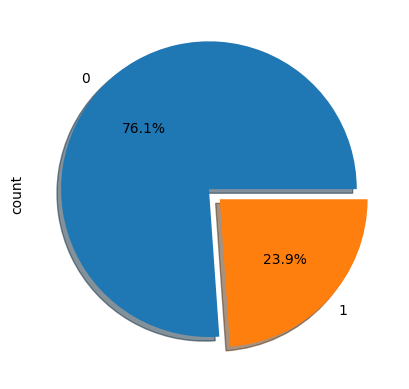

In [4]:
df['spam'].value_counts().plot(kind='pie',autopct='%1.1f%%',explode=[0.05]*df['spam'].nunique(),shadow=True)

In [5]:
spam=df[df['spam']==1]['text']
spam

0       Subject: naturally irresistible your corporate...
1       Subject: the stock trading gunslinger  fanny i...
2       Subject: unbelievable new homes made easy  im ...
3       Subject: 4 color printing special  request add...
4       Subject: do not have money , get software cds ...
                              ...                        
1363    Subject: are you ready to get it ?  hello !  v...
1364    Subject: would you like a $ 250 gas card ?  do...
1365    Subject: immediate reply needed  dear sir ,  i...
1366    Subject: wanna see me get fisted ?  fist  bang...
1367    Subject: hot stock info : drgv announces anoth...
Name: text, Length: 1368, dtype: object

In [6]:
not_spam=df[df['spam']==0]['text']
not_spam

1368    Subject: hello guys ,  i ' m " bugging you " f...
1369    Subject: sacramento weather station  fyi  - - ...
1370    Subject: from the enron india newsdesk - jan 1...
1371    Subject: re : powerisk 2001 - your invitation ...
1372    Subject: re : resco database and customer capt...
                              ...                        
5723    Subject: re : research and development charges...
5724    Subject: re : receipts from visit  jim ,  than...
5725    Subject: re : enron case study update  wow ! a...
5726    Subject: re : interest  david ,  please , call...
5727    Subject: news : aurora 5 . 2 update  aurora ve...
Name: text, Length: 4360, dtype: object

In [7]:
"""Word Cloud (বা Tag Cloud) হলো এমন একটি ভিজুয়ালাইজেশন যেখানে টেক্সট ডেটার শব্দগুলো আকার অনুযায়ী দেখানো হয়।
যে শব্দ যত বেশি বার এসেছে, সেটি তত বড় আকারে দেখানো হয়।
কম বার আসা শব্দগুলো ছোট থাকে।
Word Cloud এর কাজ কী?
টেক্সট ডেটা এক্সপ্লোরেশন (EDA)
লম্বা টেক্সট (যেমন survey responses, reviews, social media posts) থেকে কোন শব্দগুলো বেশি ব্যবহৃত হচ্ছে সেটা দ্রুত বোঝা যায়।
ডেটা ভিজুয়ালাইজেশন
প্রেজেন্টেশন বা রিপোর্টে আকর্ষণীয়ভাবে শব্দ ফ্রিকোয়েন্সি দেখানোর জন্য।
NLP/টেক্সট অ্যানালাইসিস
ডেটাসেটে গুরুত্বপূর্ণ কীওয়ার্ড বের করার জন্য প্রাথমিক ভিজুয়াল clue হিসেবে।
Sentiment Analysis এর আগে Pre-analysis
যেমন, কাস্টমার ফিডব্যাকের word cloud বানালে বোঝা যাবে কোন জিনিস নিয়ে বেশি কথা হচ্ছে।
"""

'Word Cloud (বা Tag Cloud) হলো এমন একটি ভিজুয়ালাইজেশন যেখানে টেক্সট ডেটার শব্দগুলো আকার অনুযায়ী দেখানো হয়।\nযে শব্দ যত বেশি বার এসেছে, সেটি তত বড় আকারে দেখানো হয়।\nকম বার আসা শব্দগুলো ছোট থাকে।\nWord Cloud এর কাজ কী?\nটেক্সট ডেটা এক্সপ্লোরেশন (EDA)\nলম্বা টেক্সট (যেমন survey responses, reviews, social media posts) থেকে কোন শব্দগুলো বেশি ব্যবহৃত হচ্ছে সেটা দ্রুত বোঝা যায়।\nডেটা ভিজুয়ালাইজেশন\nপ্রেজেন্টেশন বা রিপোর্টে আকর্ষণীয়ভাবে শব্দ ফ্রিকোয়েন্সি দেখানোর জন্য।\nNLP/টেক্সট অ্যানালাইসিস\nডেটাসেটে গুরুত্বপূর্ণ কীওয়ার্ড বের করার জন্য প্রাথমিক ভিজুয়াল clue হিসেবে।\nSentiment Analysis এর আগে Pre-analysis\nযেমন, কাস্টমার ফিডব্যাকের word cloud বানালে বোঝা যাবে কোন জিনিস নিয়ে বেশি কথা হচ্ছে।\n'

In [8]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [9]:
def generate_word_cloud(text_data, title):
    # Create a WordCloud object
    wordcloud = WordCloud(
        stopwords=STOPWORDS,
        background_color="white",
        width=800,
        height=400,
        random_state=42  # For reproducible results
    ).generate(text_data)

    # Display the generated image
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Hide the axes
    plt.title(title)
    plt.show()

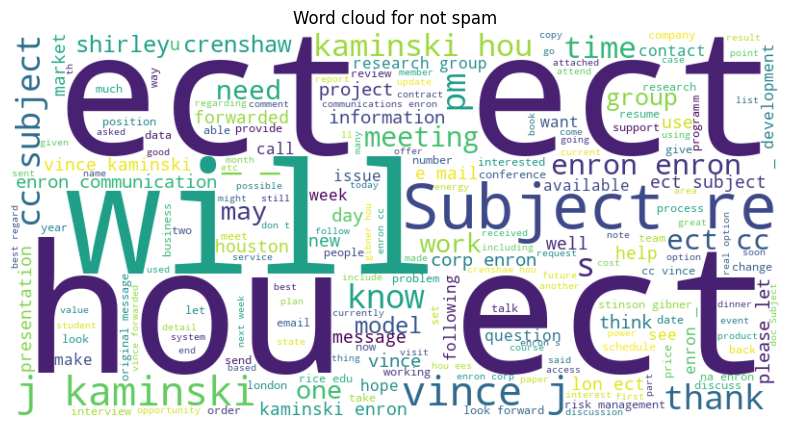

In [10]:
generate_word_cloud(" ".join(not_spam), "Word cloud for not spam")

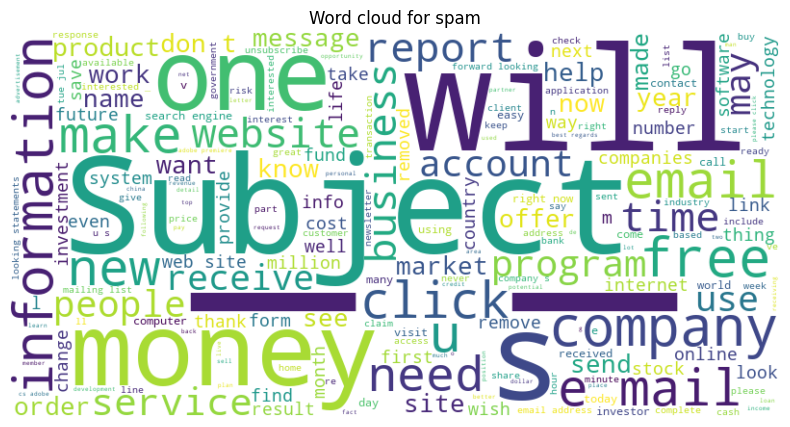

In [11]:
generate_word_cloud(" ".join(spam), "Word cloud for spam")

In [12]:
import nltk
from nltk.tokenize import word_tokenize # টেক্সটকে ছোট ছোট শব্দে (token) ভেঙে ফেলে।
from nltk.stem import WordNetLemmatizer # শব্দকে তার মূল রূপে (lemma/base form) রূপান্তর করে jmn runnin k run base word a nibe।
nltk.download("wordnet")
word_lema= WordNetLemmatizer()
from nltk.corpus import stopwords
nltk.download('stopwords')
'''Stopwords = সাধারণ শব্দ, যেগুলো টেক্সট অ্যানালাইসিসে তেমন গুরুত্বপূর্ণ নয়।
যেমন ইংরেজিতে → is, am, are, the, a, an, in, on, at, this, that
বাংলায় → এবং, বা, কিন্তু, আমি, তুমি, তারা
NLP কাজ করার সময় এগুলো অনেক সময় বাদ দেওয়া হয়,'''


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tarik\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tarik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'Stopwords = সাধারণ শব্দ, যেগুলো টেক্সট অ্যানালাইসিসে তেমন গুরুত্বপূর্ণ নয়।\nযেমন ইংরেজিতে → is, am, are, the, a, an, in, on, at, this, that\nবাংলায় → এবং, বা, কিন্তু, আমি, তুমি, তারা\nNLP কাজ করার সময় এগুলো অনেক সময় বাদ দেওয়া হয়,'

In [13]:
stop_word = set(stopwords.words('english'))
stop_word

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

# clean text

In [14]:
import re
def normalize(text):
    text = text.lower()
    text= re.sub(r'(.)\1+',r'\1', text) # multiple charactor
    text= re.sub(r'[^\w\s]',"", text)# punction remove (!,.?;:/)
    text = re.sub(r"\d", "", text) # for digit remove
    text = re.sub(r"can't","cannot", text) # constractions can't k cannot korbe
    text = re.sub(r"isn't","isnot", text)
    # remove bengali word
    #text = re.sub(r'\P{L}*\p{Bengali}+(?:\P{L}+\p{Bengali}+)*\P{L}*', "", text)
    # url remove 
    text= re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+',"",text)

    #remove stopwords
    token= word_tokenize(text)
    text = [word_lema.lemmatize(word) for word in token if word not in stop_word]
    text = " ".join(text)
    return text

In [15]:
df["clean_text"]= df["text"].apply(normalize)
df.head()

,text,spam,clean_text
0,Subject: naturally irresistible your corporate...,1,subject naturaly iresistible corporate identit...
1,Subject: the stock trading gunslinger fanny i...,1,subject stock trading gunslinger fany meril mu...
2,Subject: unbelievable new homes made easy im ...,1,subject unbelievable new home made easy im wan...
3,Subject: 4 color printing special request add...,1,subject color printing special request adition...
4,"Subject: do not have money , get software cds ...",1,subject money get software cd software compati...


In [16]:
spam1= df[df["spam"]==1]["clean_text"]
not_spa1= df[df["spam"]==0]["clean_text"]

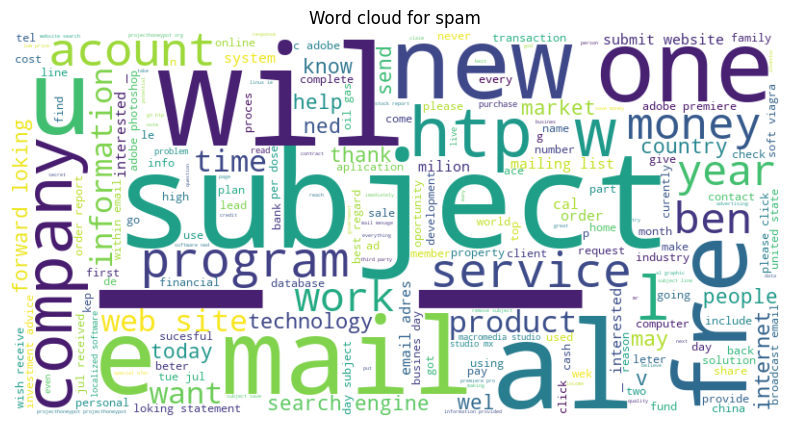

In [17]:
generate_word_cloud(" ".join(spam1), "Word cloud for spam")

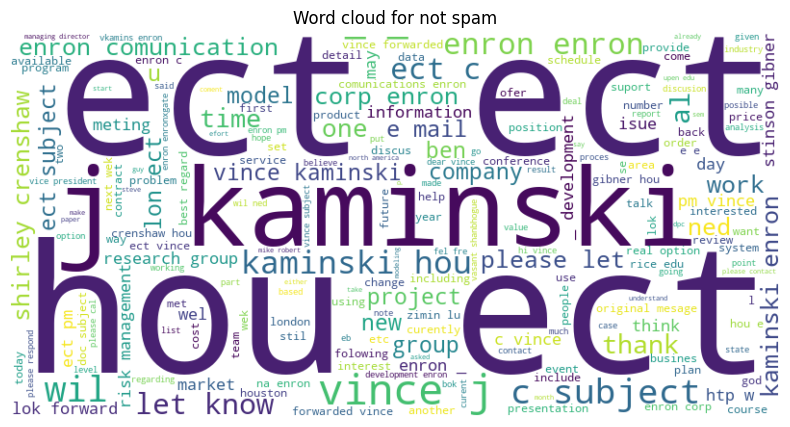

In [18]:
generate_word_cloud(" ".join(not_spa1), "Word cloud for not spam")

In [19]:
df.columns

Index(['text', 'spam', 'clean_text'], dtype='object')

In [20]:
y = df["spam"]
x =df["clean_text"]

In [21]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(x,y, test_size=.15, random_state=42)

In [22]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((4868,), (860,), (4868,), (860,))

In [23]:
xtrain

1600    subject payrol elena chilkina paid folowing da...
485     subject last longer bed helo ejaculate within ...
4884    subject corporate alocation enron research gro...
2517    subject helo al please send email ibuyit enron...
5128    subject fw london work hi london sems left aug...
                              ...                        
3772    subject john sherif coper position ted bjorn i...
5191    subject national forum corporate finance mr fa...
5226    subject first draft quentin forwarded resume s...
5390    subject johan dahl mri energy stafing group vi...
860     subject perfect visual solution busines workin...
Name: clean_text, Length: 4868, dtype: object

In [24]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
"""Kono kaj: Classification problem solve kora.
Random Forest = onek decision trees er ensemble.
Protiti tree alada vabe decision ney, pore majority vote kore final prediction dey."""

'Kono kaj: Classification problem solve kora.\nRandom Forest = onek decision trees er ensemble.\nProtiti tree alada vabe decision ney, pore majority vote kore final prediction dey.'

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf= TfidfVectorizer() 
#Text data ke numerical format-e convert kora, jate machine learning model bujhbe.


In [28]:
new_xtrain = tf_idf.fit_transform(xtrain)
new_xtrain.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(4868, 28332))

In [34]:
new_xtest=tf_idf.transform(xtest)

In [35]:
model = rf.fit(new_xtrain,ytrain)

In [36]:
model.score(new_xtrain,ytrain)

1.0

In [38]:
model.score(new_xtest,ytest)

0.9697674418604652

# Test model

In [39]:
text= "You've Been Selected! Claim Your $500 Gift Card Now - Limited Time!"
clean_text = normalize(text)
clean_text

'youve ben selected claim gift card limited time'

In [40]:
df1= pd.Series(clean_text)
new_test_vec_data= tf_idf.transform(df1)
new_test_vec_data.shape

(1, 28332)

In [41]:
model2 = model.predict(new_test_vec_data)
model2

array([1])

In [42]:
import pickle
with open("model.pkl",'wb') as file:
    pickle.dump(model,file)

In [43]:
import pickle
with open("vec.pkl","wb") as file:
    pickle.dump(tf_idf,file)